In [1]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from untrade.client import Client
import ta
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from arch import arch_model  # For GARCH model

from sklearn.cluster import MiniBatchKMeans

from scipy.stats import norm


In [2]:
data = pd.read_csv(
    '/Users/tejasmacipad/Desktop/Final_inter_IIT_submission/BTC/BTC_2019_2023_4h.csv',
    parse_dates=['datetime'],  # Parse the 'datetime' column as datetime
    index_col='datetime'       # Use 'datetime' as the index
)

print(data.head())

data = data.dropna()
data = data[["close"]].copy()

                     Unnamed: 0      open      high       low     close  \
datetime                                                                  
2019-09-08 16:00:00           0  10000.00  10357.53  10000.00  10340.12   
2019-09-08 20:00:00           1  10340.12  10412.65  10324.77  10391.63   
2019-09-09 00:00:00           2  10316.62  10316.68  10267.37  10297.89   
2019-09-09 04:00:00           3  10297.89  10316.34  10092.71  10149.47   
2019-09-09 08:00:00           4  10149.47  10475.54  10077.22  10414.60   

                       volume  
datetime                       
2019-09-08 16:00:00   471.661  
2019-09-08 20:00:00  2624.630  
2019-09-09 00:00:00   779.449  
2019-09-09 04:00:00  2664.789  
2019-09-09 08:00:00  2466.485  


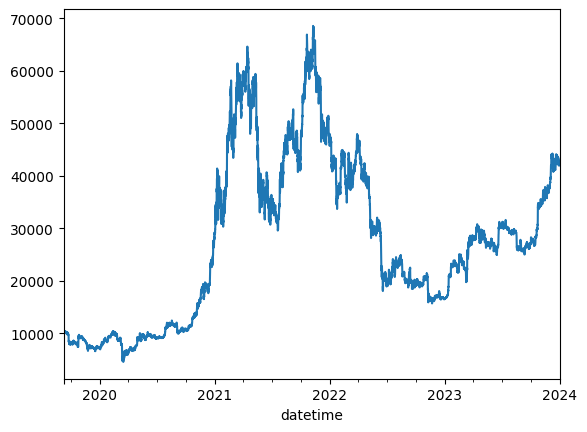

In [3]:
#plotting the close data
data['close'].plot()
plt.show()

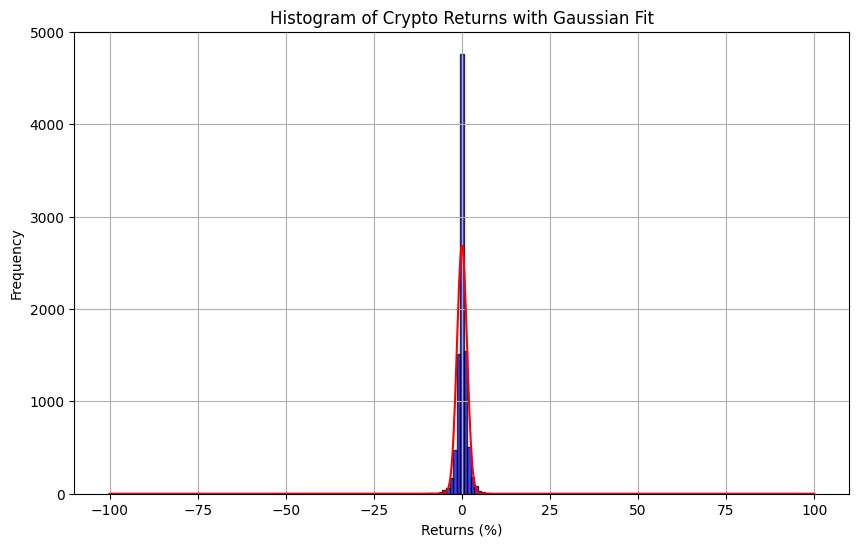

In [4]:
data["returns"] = data["close"].pct_change()
data.dropna(subset=["returns"], inplace=True)
data["returns"] *= 100

hist_data, bin_edges = np.histogram(data["returns"], bins=np.linspace(-100, 100, 200))

mean = np.mean(data["returns"])
variance = np.var(data["returns"])
std_dev = np.sqrt(variance)

x = np.linspace(-100, 100, 1000)
gaussian = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.hist(data["returns"], bins=np.linspace(-100, 100, 200), alpha=0.75, color='blue', edgecolor='black')
plt.plot(x, gaussian * len(data["returns"]) * (bin_edges[1] - bin_edges[0]), color='red')
plt.title('Histogram of Crypto Returns with Gaussian Fit')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

hist_data_list = hist_data.tolist()

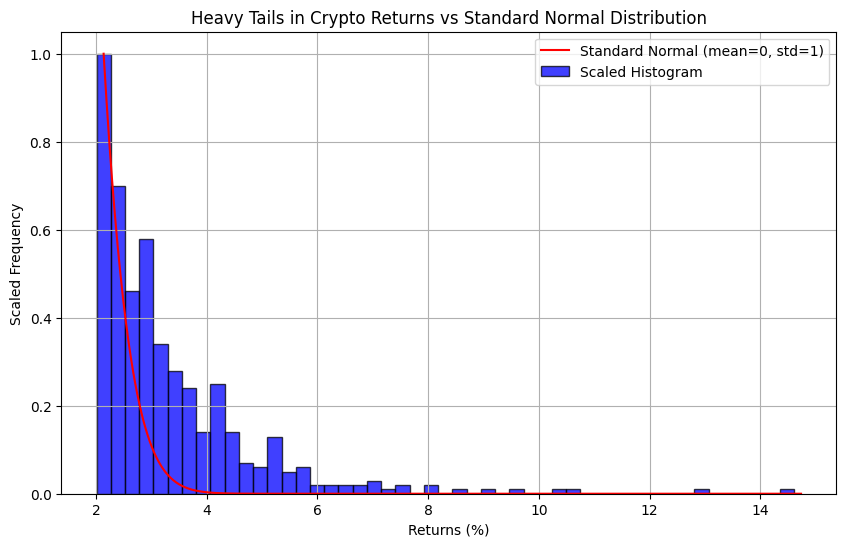

In [5]:
data["returns"] = data["close"].pct_change()
data.dropna(subset=["returns"], inplace=True)
data["returns"] *= 100

# Focus on the last 5% of the sorted data
tail_data = np.sort(data["returns"])[int(0.95 * len(data["returns"])):]
bins = np.linspace(min(tail_data), max(tail_data), 50)

# Histogram for the tail data
hist_data, bin_edges = np.histogram(tail_data, bins=bins)

# Normalize the histogram data by its maximum value
hist_data_scaled = hist_data / np.max(hist_data)

# Standard normal distribution (mean=0, std_dev=1)
x = np.linspace(min(tail_data), max(tail_data), 1000)
gaussian = norm.pdf(x, 0, 1)
gaussian_scaled = gaussian / np.max(gaussian)

# Plot the scaled histogram and the scaled standard normal Gaussian curve
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_data_scaled, width=np.diff(bin_edges), alpha=0.75, color='blue', edgecolor='black', label='Scaled Histogram')
plt.plot(x, gaussian_scaled, color='red', label='Standard Normal (mean=0, std=1)')
plt.title('Heavy Tails in Crypto Returns vs Standard Normal Distribution')
plt.xlabel('Returns (%)')
plt.ylabel('Scaled Frequency')
plt.legend()
plt.grid(True)
plt.show()